In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [77]:
hrdata_df = pd.read_csv('HR_comma_sep.csv')
hrdata_df['satisfaction_level']*=100
hrdata_df['last_evaluation']*=100
left_company = hrdata_df.loc[(hrdata_df['left'] == 1)]
accident = hrdata_df.loc[(hrdata_df['Work_accident'] > 0)]
left_company.head(10)



#The Columns are: Satisfaction Level (Ratio), Last Evaluation (Ratio), Number of Projects (Ratio), Avg Monthly Hours (ratio)
#Time Spent at Company (Ratio), Work Accident (Ratio), Left (Categorical), 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,38.0,53.0,2,157,3,0,1,0,sales,low
1,80.0,86.0,5,262,6,0,1,0,sales,medium
2,11.0,88.0,7,272,4,0,1,0,sales,medium
3,72.0,87.0,5,223,5,0,1,0,sales,low
4,37.0,52.0,2,159,3,0,1,0,sales,low
5,41.0,50.0,2,153,3,0,1,0,sales,low
6,10.0,77.0,6,247,4,0,1,0,sales,low
7,92.0,85.0,5,259,5,0,1,0,sales,low
8,89.0,100.0,5,224,5,0,1,0,sales,low
9,42.0,53.0,2,142,3,0,1,0,sales,low


/Users/bryancorder/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


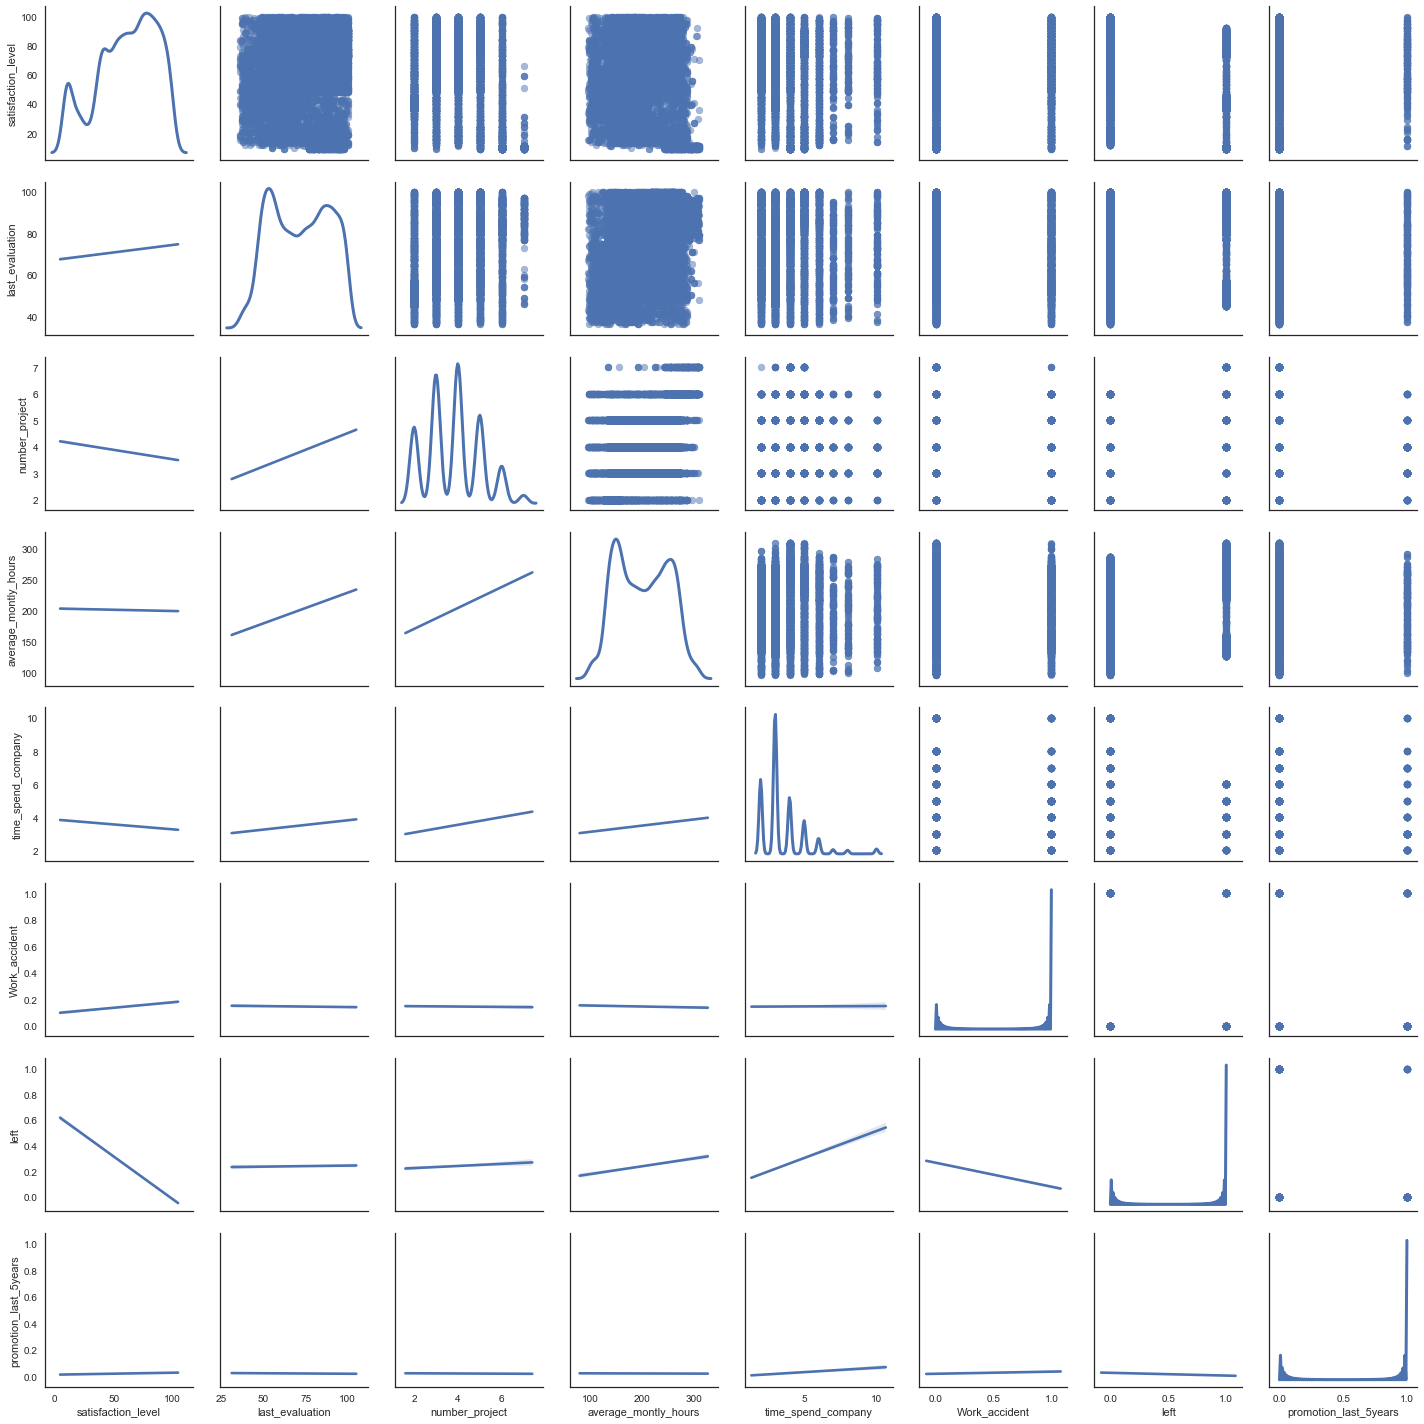

In [78]:
sns.set_style("white")
df_jittered = hrdata_df.loc[:, 'satisfaction_level':'promotion_last_5years'].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns)
    
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

/Users/bryancorder/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


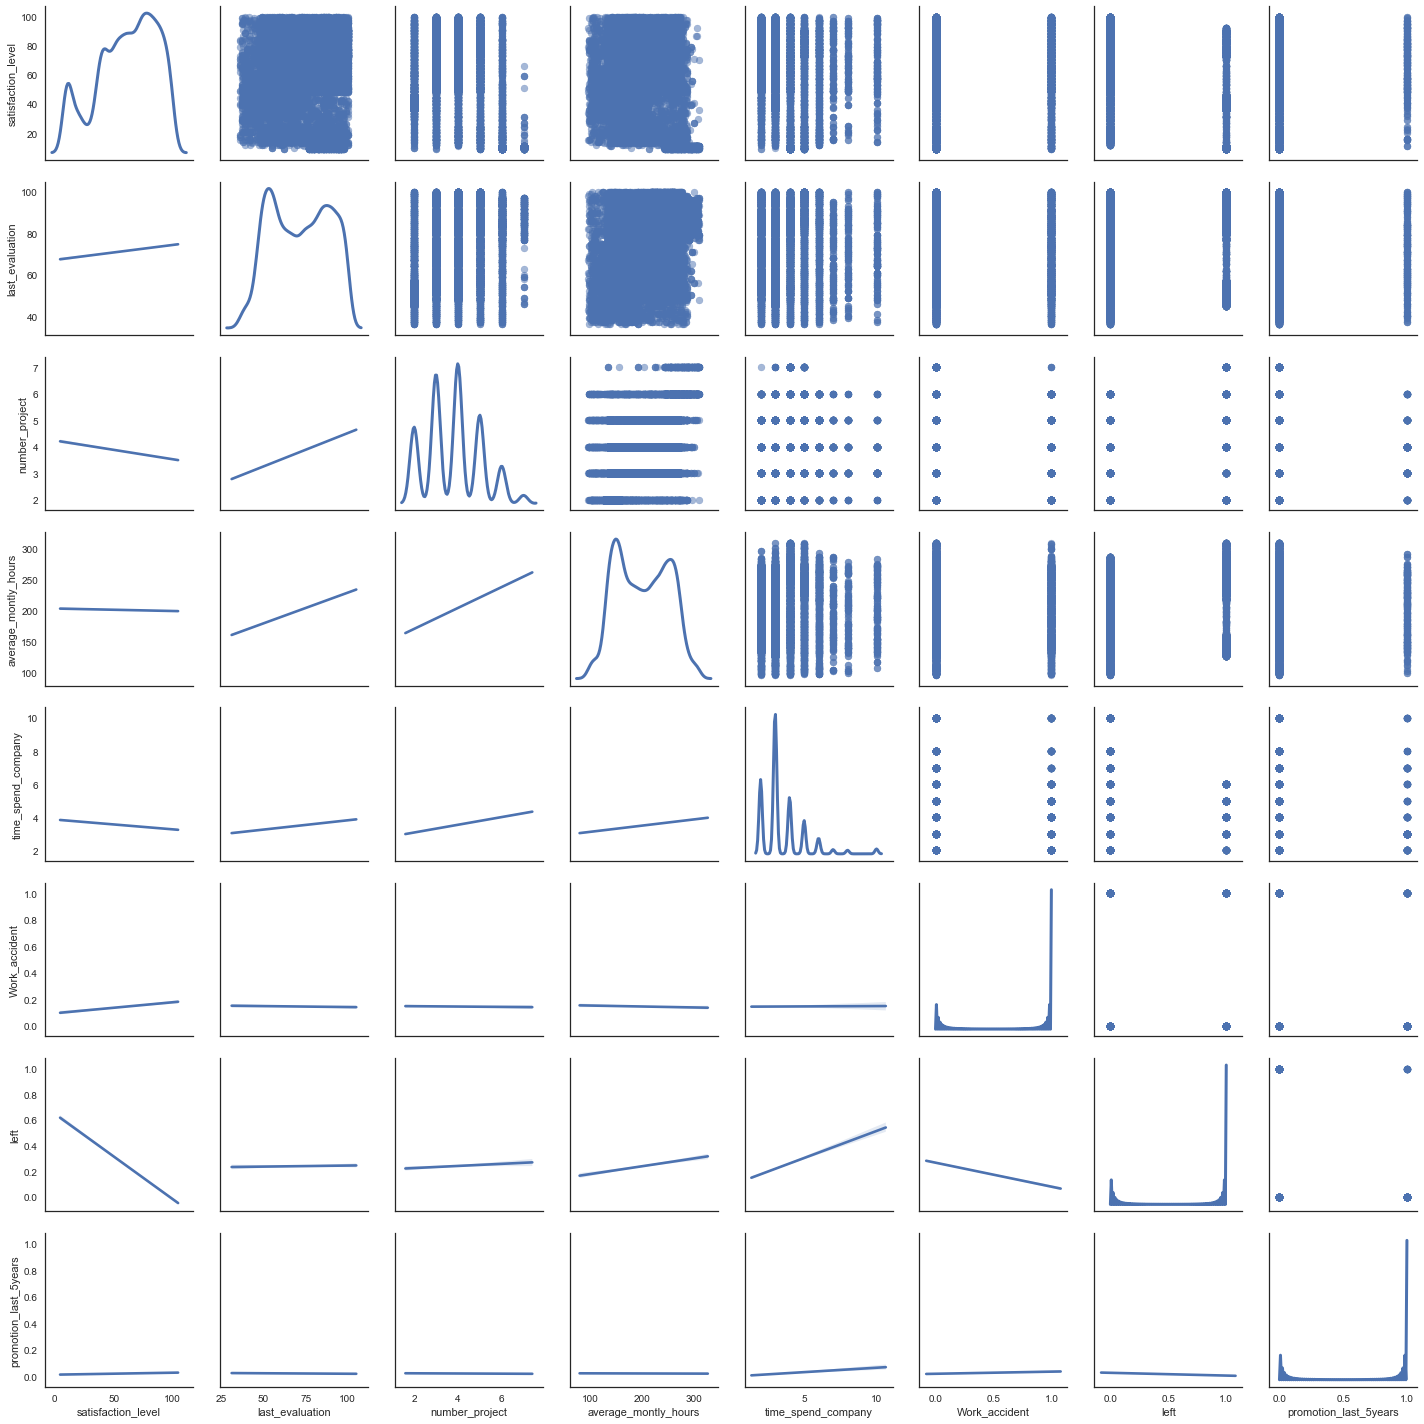

In [79]:
sns.set_style("white")

g = sns.PairGrid(hrdata_df.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

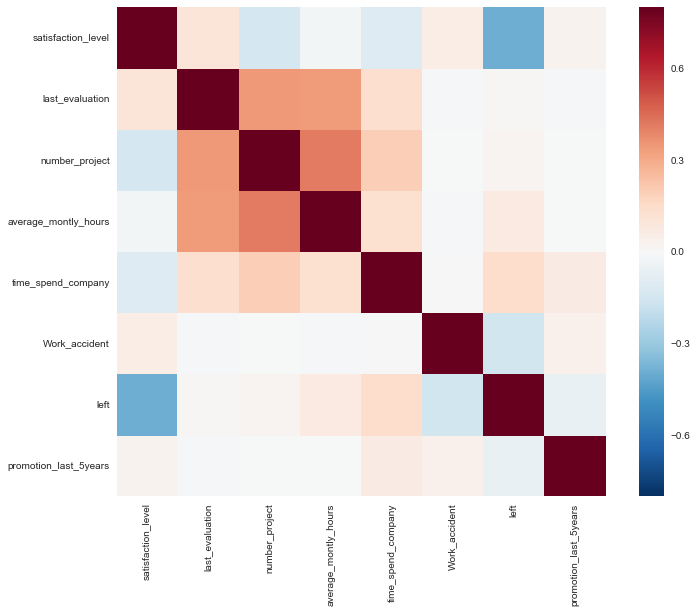

In [80]:
corrmat = hrdata_df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [157]:
"""df_long = hrdata_df
df_long = pd.melt(df_long, id_vars=['left'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "left", "value")
plt.show()

# Descriptive statistics by group.
print(hrdata_df.groupby('left').describe())

# Test whether group differences are significant.
for col in hrdata_df.loc[:,'satisfaction_level':'promotion_last_5years'].columns:
    print(col)
    print(stats.ttest_ind(
        df_czch[hrdata_df['left'] == '0'][col].dropna(),
        df_czch[hrdata_df['left'] == '1'][col].dropna()
    ))"""

'df_long = hrdata_df\ndf_long = pd.melt(df_long, id_vars=[\'left\'])\n\ng = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)\ng = g.map(sns.boxplot, "left", "value")\nplt.show()\n\n# Descriptive statistics by group.\nprint(hrdata_df.groupby(\'left\').describe())\n\n# Test whether group differences are significant.\nfor col in hrdata_df.loc[:,\'satisfaction_level\':\'promotion_last_5years\'].columns:\n    print(col)\n    print(stats.ttest_ind(\n        df_czch[hrdata_df[\'left\'] == \'0\'][col].dropna(),\n        df_czch[hrdata_df[\'left\'] == \'1\'][col].dropna()\n    ))'

In [158]:
#Create new variables
vals_to_replace = {'low':30, 'medium':60, 'high':90}
hrdata_df['num_salary'] = hrdata_df['salary'].map(vals_to_replace)
vals_to_replace2 = {1:100, 2:80, 3:60, 4:0, 5:0, 6:60, 7:80, 8:100}
hrdata_df['project_parab'] = hrdata_df['number_project'].map(vals_to_replace2)
hrdata_df['level_of_work'] = round(hrdata_df['average_montly_hours'] / hrdata_df['time_spend_company'], 0).astype(int)
hrdata_df['neg_last_evaluation'] = 100 - hrdata_df['last_evaluation']
hrdata_df['projpara_neg_eval'] = round((hrdata_df['neg_last_evaluation']**2 + hrdata_df['project_parab']**2)**0.5, 0).astype(int)
hrdata_df['neg_satisfied_eval_square'] = (hrdata_df['dissatisfaction_level']**2) + (hrdata_df['neg_last_evaluation']**2)
hrdata_df['work_projects'] = (hrdata_df['number_project']**2) + (hrdata_df['average_montly_hours']**2)
hrdata_df['skilled'] = hrdata_df['Work_accident'] * hrdata_df['promotion_last_5years']
hrdata_df['veteran'] = hrdata_df['time_spend_company'] * hrdata_df['promotion_last_5years']
#Binary eval numbers 0 = positive and 1 = negative to compare against ['left'] 0 = stayed and 1 = left 
"""hrdata_df['binary_eval'] = hrdata_df.replace(['last_evaluation'] > 50, 0) & hrdata_df.replace(['last_evaluation'] <= 50, 1) 
hrdata_df['binary_eval'] = hrdata_df.replace(['last_evaluation'] <= 50, 1)"""


hrdata_df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,...,level_of_work,dissatisfaction_level,neg_last_evaluation,neg_satisfied_eval_square,work_projects,skilled,veteran,num_salary,project_parab,projpara_neg_eval
0,38.0,53.0,2,157,3,0,1,0,sales,low,...,52,62,47.0,6053.0,24653,0,0,30,80,93
1,80.0,86.0,5,262,6,0,1,0,sales,medium,...,44,20,14.0,596.0,68669,0,0,60,0,14
2,11.0,88.0,7,272,4,0,1,0,sales,medium,...,68,89,12.0,8065.0,74033,0,0,60,80,81
3,72.0,87.0,5,223,5,0,1,0,sales,low,...,45,28,13.0,953.0,49754,0,0,30,0,13
4,37.0,52.0,2,159,3,0,1,0,sales,low,...,53,63,48.0,6273.0,25285,0,0,30,80,93
5,41.0,50.0,2,153,3,0,1,0,sales,low,...,51,59,50.0,5981.0,23413,0,0,30,80,94
6,10.0,77.0,6,247,4,0,1,0,sales,low,...,62,90,23.0,8629.0,61045,0,0,30,60,64
7,92.0,85.0,5,259,5,0,1,0,sales,low,...,52,8,15.0,289.0,67106,0,0,30,0,15
8,89.0,100.0,5,224,5,0,1,0,sales,low,...,45,11,0.0,121.0,50201,0,0,30,0,0
9,42.0,53.0,2,142,3,0,1,0,sales,low,...,47,58,47.0,5573.0,20168,0,0,30,80,93


                           satisfaction_level  last_evaluation  \
satisfaction_level                   1.000000         0.105021   
last_evaluation                      0.105021         1.000000   
number_project                      -0.142970         0.349333   
average_montly_hours                -0.020048         0.339742   
time_spend_company                  -0.100866         0.131591   
Work_accident                        0.058697        -0.007104   
left                                -0.388375         0.006567   
promotion_last_5years                0.025605        -0.008684   
satisfied_eval                       0.875895         0.535858   
level_of_work                        0.162327         0.084775   
dissatisfaction_level               -0.999978        -0.105022   
neg_last_evaluation                 -0.105021        -1.000000   
neg_satisfied_eval_square           -0.911351        -0.413411   
work_projects                       -0.056643         0.332766   
skilled   

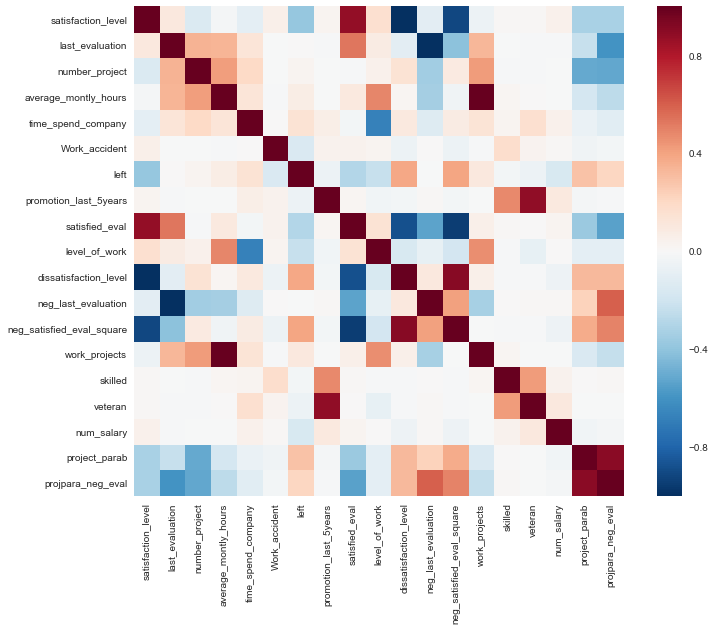

In [169]:
corrmat = hrdata_df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [170]:
df_pca = hrdata_df['dissatisfaction_level','project_parab','projpara_neg_eval','left','num_salary']
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

KeyError: ('dissatisfaction_level', 'project_parab', 'projpara_neg_eval', 'left', 'num_salary')